In [3]:
import pandas as pd
df = pd.read_csv("index_1.csv")
df.shape

(3636, 6)

In [4]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [7]:
df.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [17]:
#top selling coffees
best = df['coffee_name'].value_counts()
print(best)
## same as 
best1 = df.groupby('coffee_name').size()
print(best1)


coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64
coffee_name
Americano              578
Americano with Milk    824
Cappuccino             501
Cocoa                  243
Cortado                292
Espresso               134
Hot Chocolate          282
Latte                  782
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

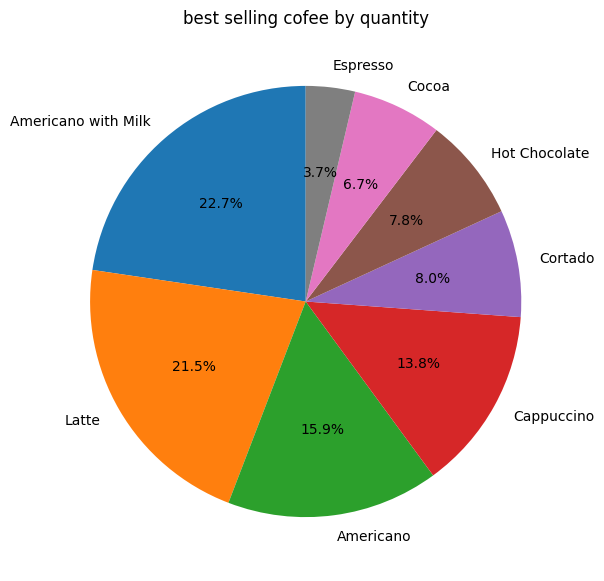

In [19]:
import matplotlib.pyplot as plt
best = df['coffee_name'].value_counts()
plt.figure(figsize=(7,7))
best.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('best selling cofee by quantity')
plt.ylabel('')
plt.show


In [25]:
#highest revenue making coffee
highest_rev = df.groupby('coffee_name').agg(
    total_cups = ('coffee_name','count'),
    revenue = ('money','sum')).reset_index()
print(highest_rev)

           coffee_name  total_cups   revenue
0            Americano         578  15062.26
1  Americano with Milk         824  25269.12
2           Cappuccino         501  18034.14
3                Cocoa         243   8678.16
4              Cortado         292   7534.86
5             Espresso         134   2814.28
6        Hot Chocolate         282  10172.46
7                Latte         782  27866.30


           coffee_name  total_cups   revenue
0            Americano         578  15062.26
1  Americano with Milk         824  25269.12
2           Cappuccino         501  18034.14
3                Cocoa         243   8678.16
4              Cortado         292   7534.86
5             Espresso         134   2814.28
6        Hot Chocolate         282  10172.46
7                Latte         782  27866.30


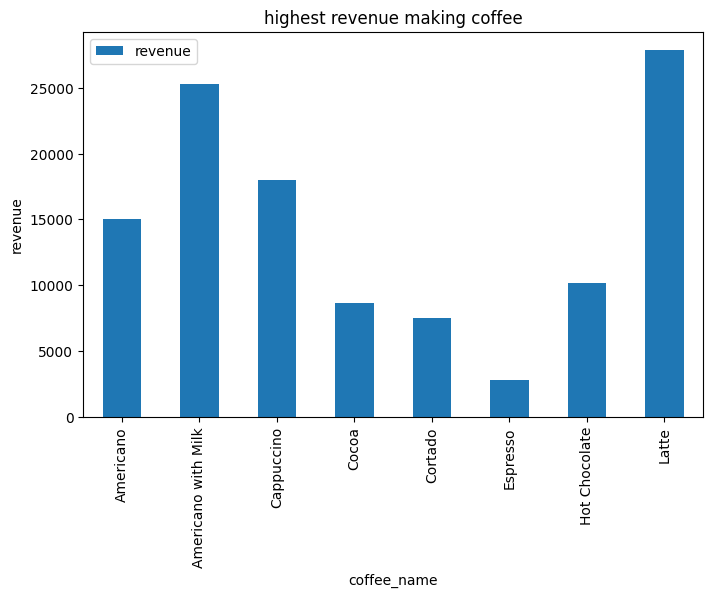

In [30]:
#highest revenue making coffee
highest_rev = df.groupby('coffee_name').agg(
    total_cups = ('coffee_name','count'),
    revenue = ('money','sum')).reset_index()
print(highest_rev)
highest_rev.plot(kind='bar',x='coffee_name',y='revenue',figsize=(8,5))
plt.title('highest revenue making coffee')
plt.xlabel('coffee_name')
plt.ylabel('revenue')
plt.show()

hour           16
sales_count     4
dtype: int64
    hour  sales_count
0      6            5
1      7           91
2      8          235
3      9          247
4     10          349
5     11          294
6     12          249
7     13          227
8     14          228
9     15          245
10    16          283
11    17          244
12    18          220
13    19          235
14    20          171
15    21          197
16    22          116


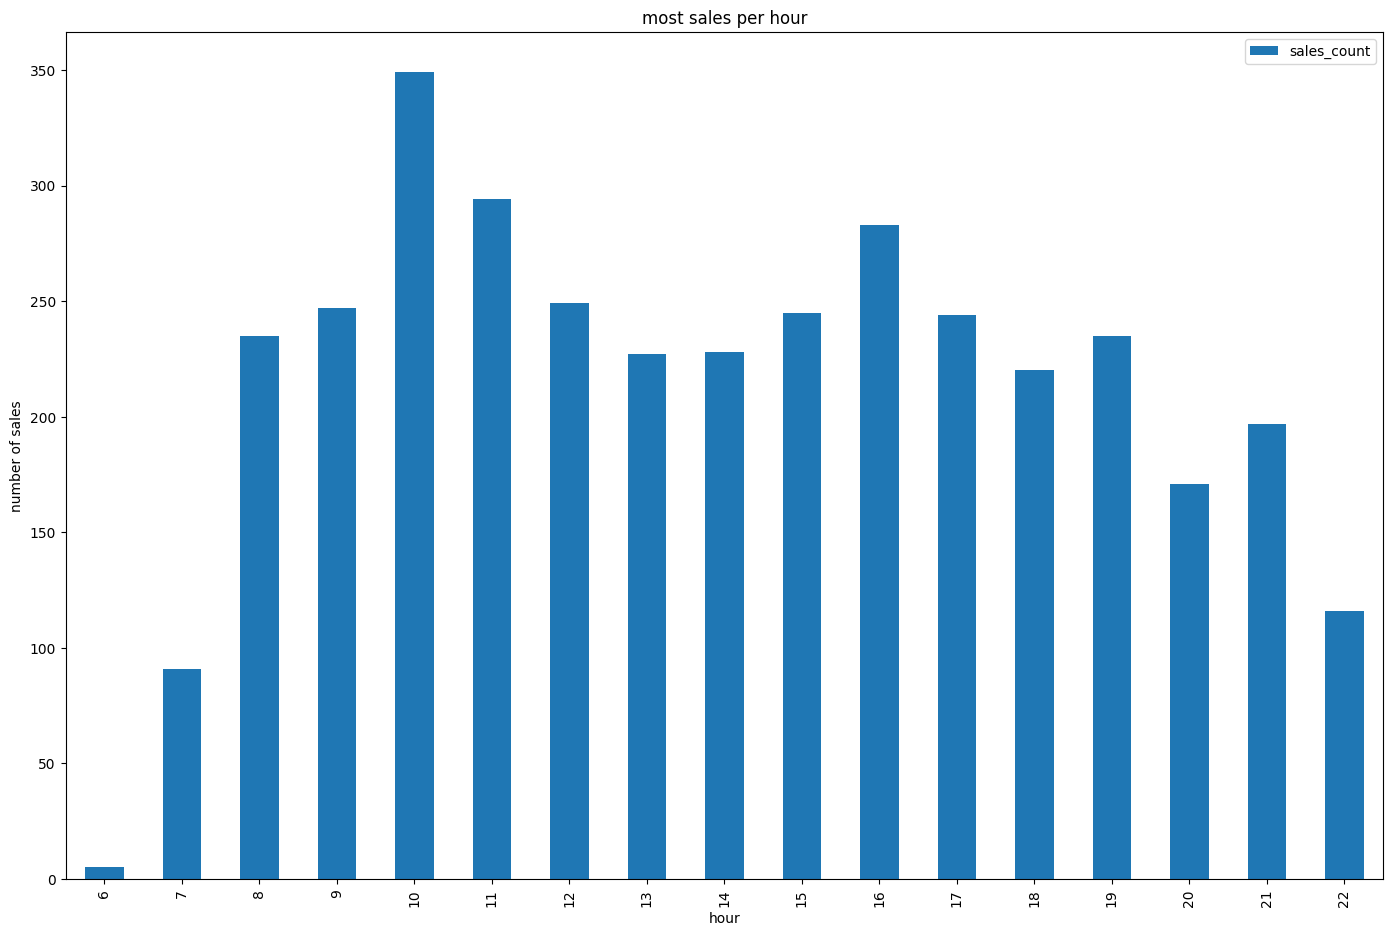

In [40]:
#most selling time 
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
sales_per_hour = df.groupby('hour').size().reset_index (name= "sales_count")
best_hour = sales_per_hour.idxmax()
print(best_hour)
print(sales_per_hour)
sales_per_hour.plot(kind='bar',y='sales_count',x = 'hour',figsize=(17,11))
plt.title('most sales per hour')
plt.ylabel('number of sales')
plt.xlabel('hour')
plt.show()



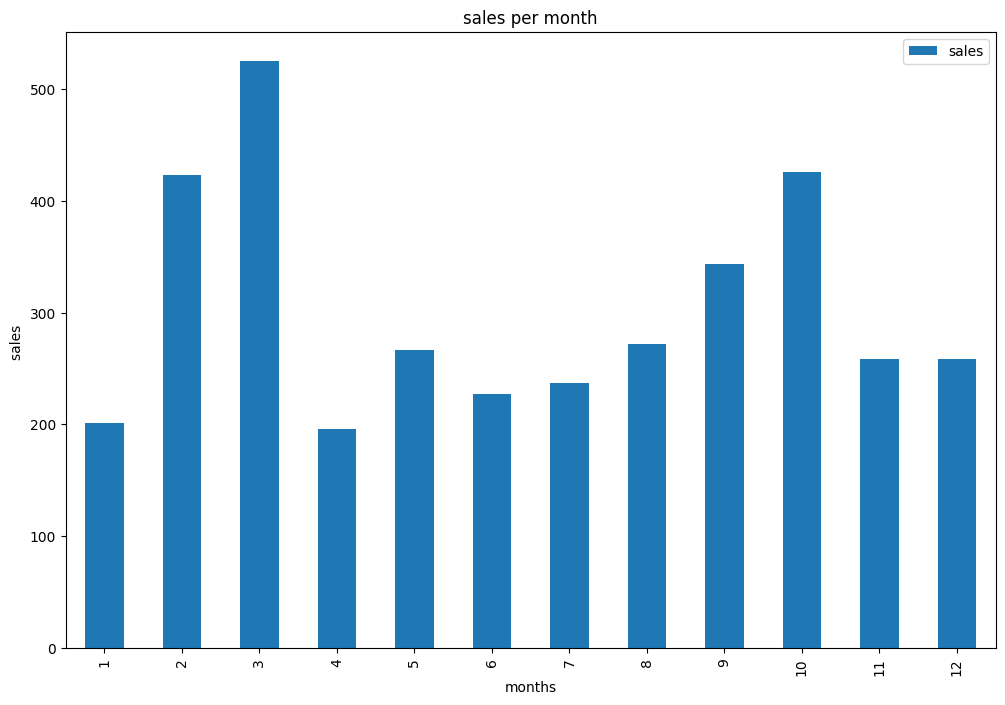

In [43]:
df['month'] = df['datetime'].dt.month
monthly_sales = df.groupby('month').size().reset_index(name="sales")
monthly_sales.plot(kind='bar',x='month',y='sales',figsize = (12,8))
plt.title('sales per month')
plt.xlabel('months')
plt.ylabel('sales ')
plt.show()
